In this file, we amplitude encode nouns represented by four dimensional vectors in classical vector spaces onto Hilbert spaces spanned by two qubits. 

We use three different models for the QNLP workflow:
    - Numpy model 
    - Tket model 
    - Pennylane model 

And we use different methods of amplitude encoding:
    - Encoding of Wikipedia2Vec 
    - Encoding of Naive assumption 
    - Encoding of Baseline (all nouns initialized to |00>)

In [1]:
# Import all kinds of lambeq stuff 
from lambeq.backend.grammar import (Box, Cap, Cup, Diagram, Diagrammable,
                                    Functor, grammar, Id, Spider, Swap,
                                    Ty, Word)
from lambeq.backend.drawing import draw
import matplotlib.pyplot as plt
import matplotlib
from lambeq import AtomicType

# optimising the diagram to make the resulting quanutm circuit less complex
from lambeq import RemoveSwapsRewriter, RemoveCupsRewriter
from lambeq import Rewriter 

# creating the quantum circuit
from lambeq import IQPAnsatz
from pytket.extensions.qiskit import tk_to_qiskit

import numpy as np

# amplitude Encoding
from qiskit import QuantumCircuit

/home/bob/anaconda3/envs/code/lib/python3.9/site-packages/numpy/core/getlimits.py:542: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [2]:
import numpy as np

BATCH_SIZE = 10
EPOCHS = 500
LEARNING_RATE = 3e-2
SEED = 2

In [3]:

# load training data 

def read_data(filename):
    labels, sentences = [], []
    with open(filename) as f:
        for line in f:
            t = int(line[0])
            labels.append([t, 1-t])
            sentences.append(line[1:].strip())
    return labels, sentences


train_labels, forget  = read_data('../datasets/mc_train_data.txt')
test_labels, forget = read_data('../datasets/mc_test_data.txt')
val_labels, forget = read_data('../datasets/mc_dev_data.txt')


# here, we can choose between either the original dataset by Coecke et al. or the new one for Gijs' data

gijs = True

if not gijs: 
    # new way, maybe the things after the words confused lambeq in creating the diagrams 
    with open('../datasets/newTestSentences.txt', 'r') as file: 
        test_data = file.readlines()
    with open('../datasets/newTrainSentences.txt', 'r') as file: 
        train_data = file.readlines()
    with open('../datasets/newValSentences.txt', 'r') as file: 
        val_data = file.readlines()

    test_data = [sentence.strip() for sentence in test_data]
    train_data = [sentence.strip() for sentence in train_data]
    val_data = [sentence.strip() for sentence in val_data]


if gijs:
    # new way, maybe the things after the words confused lambeq in creating the diagrams 
    with open('../datasets/testGijs.txt', 'r') as file: 
        test_data = file.readlines()
    with open('../datasets/trainGijs.txt', 'r') as file: 
        train_data = file.readlines()
    with open('../datasets/valGijs.txt', 'r') as file: 
        val_data = file.readlines()

    test_data = [sentence.strip() for sentence in test_data]
    train_data = [sentence.strip() for sentence in train_data]
    val_data = [sentence.strip() for sentence in val_data]


In [4]:
# parse sentences from data to diagrams 

from lambeq import BobcatParser

parser = BobcatParser(verbose='text')

raw_train_diagrams = parser.sentences2diagrams(train_data, suppress_exceptions=True)
raw_test_diagrams = parser.sentences2diagrams(test_data, suppress_exceptions=True)
raw_val_diagrams = parser.sentences2diagrams(val_data, suppress_exceptions=True)

Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.
Tagging sentences.
Parsing tagged sentences.
Turning parse trees to diagrams.


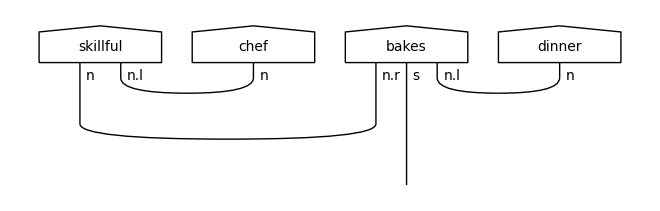

In [5]:
raw_train_diagrams[1].draw()

In [6]:
# normalising by removing cups 

from lambeq import RemoveCupsRewriter

remove_cups = RemoveCupsRewriter()

train_diagrams = [remove_cups(diagram) for diagram in raw_train_diagrams]
dev_diagrams = [remove_cups(diagram) for diagram in raw_val_diagrams]
test_diagrams = [remove_cups(diagram) for diagram in raw_test_diagrams]



In [7]:
'''
This is new when amplitude encoding: 

we include the dictionary indicating what four dimensional word vector to use for what word 

'''

import json

# wiki2vec
with open("../datasets/newNounVectorsICA.json", 'r') as fp:
    parameterDict = json.load(fp)

# extreme encodes all words to two extreme sides of the bloch sphere 
# with open("../datasets/extremeNounVectors.json", 'r') as fp:
#     parameterDict = json.load(fp)

# trivial encodes all words to [0,0,0,0]
# with open("../datasets/trivialNounVectors.json", 'r') as fp:
#     parameterDict = json.load(fp)
#

# NQ = 2

# # in the case of one qubit, the parameter dict is simply: 
# if NQ == 1:
#     parameterDict = {}
#     parameterDict['woman'] = np.pi/2
#     parameterDict['man'] = np.pi/2
#     parameterDict['person'] = np.pi/2
#     parameterDict['meal'] = 0
#     parameterDict['dinner'] = 0
#     parameterDict['sauce'] = 0
#     parameterDict['program'] = np.pi
#     parameterDict['application'] = np.pi
#     parameterDict['software'] = np.pi



The number of noun parameters does not fit the number of single qubit operators. 
params in circuitfunction: [[chef__n_0]]
thetas:  [chef__n_0]
we have to do somehting
the word is:   chef
is it daggered?  False
and the parameters are:  [-0.5822482293821133, 0.09506440404429446, 0.626255709681434, -0.5096602246168525]
vector to amplitude encode:  [-0.58224823  0.0950644   0.62625571 -0.50966022]
params in circuitfunction: [[prepares__n.r@s@n.l_0 prepares__n.r@s@n.l_1 prepares__n.r@s@n.l_2
  prepares__n.r@s@n.l_3]]
thetas:  [prepares__n.r@s@n.l_0 prepares__n.r@s@n.l_1 prepares__n.r@s@n.l_2
 prepares__n.r@s@n.l_3]
params in circuitfunction: [[sauce†_n__0]]
thetas:  [sauce†_n__0]
we have to do somehting
the word is:   sauce
is it daggered?  True
and the parameters are:  [0.04953897561678881, -0.9932085956829393, 0.09884553146826462, -0.03622342149934575]
vector to amplitude encode:  [ 0.04953898 -0.9932086   0.09884553 -0.03622342]
params in circuitfunction: [[skillful†_n@n.l__0 skillful†_

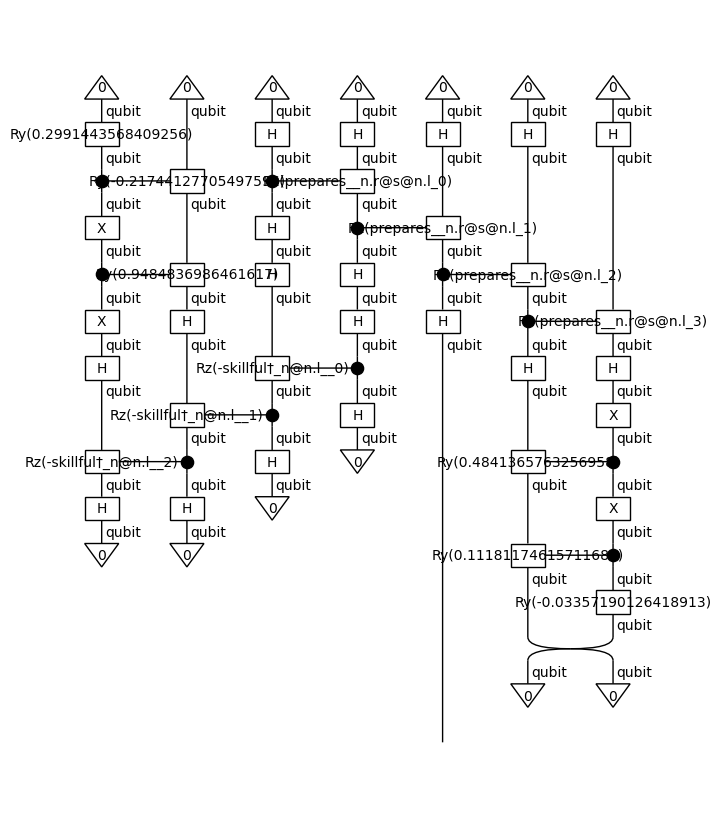

In [8]:
# create quantum circuits using the amplitude encoding ansatz

from lambeq import AtomicType, IQPAnsatz

ansatz = IQPAnsatz({AtomicType.NOUN: 2, AtomicType.SENTENCE: 1},
                   n_layers=1, n_single_qubit_params=3)

# replace the naive way of encoding with the amplitude encoding Code developed in the file IQPAmplitudeEncoding.py 
from IQPAmplitudeEncode import * 


# the corresponding function is IQPAmplitudeEncode2QB
ansatz = IQPAmplitudeEncode2QB({AtomicType.NOUN: 2, AtomicType.SENTENCE: 1},
                   n_layers=1, nounParams=np.array([1,2,3,4, 1,2,3,4,]), parameterDict=parameterDict, n_single_qubit_params=3)


# from IQPAmplitudeEnc yers=1, nounParams=np.array([1,2,3,4, 1,2,3,4,]), n_single_qubit_params=3)

train_circuits = [ansatz(diagram) for diagram in train_diagrams]
val_circuits =  [ansatz(diagram) for diagram in dev_diagrams]
test_circuits = [ansatz(diagram) for diagram in test_diagrams]

train_circuits[0].draw(figsize=(6, 8))

First model: Pennylane 

In [9]:
from lambeq import PennyLaneModel

all_circuits = train_circuits + val_circuits + test_circuits

# if no backend_config is provided, the default is used, which is the same as below
backend_config = {'backend': 'default.qubit'}  # this is the default PennyLane simulator
modelPennylane = PennyLaneModel.from_diagrams(all_circuits,
                                     probabilities=True,
                                     normalize=True,
                                     backend_config=backend_config)
modelPennylane.initialise_weights()



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [10]:
from lambeq import Dataset

train_dataset = Dataset(train_circuits,
                        train_labels,
                        batch_size=BATCH_SIZE)
                          
val_dataset = Dataset(val_circuits, val_labels)

In [11]:
def accPL(y_hat, y):
    return (torch.argmax(y_hat, dim=1) ==
            torch.argmax(y, dim=1)).sum().item()/len(y)

def loss(y_hat, y):
    return torch.nn.functional.mse_loss(y_hat, y)

In [12]:
from lambeq import PytorchTrainer
import torch

trainerPennylane = PytorchTrainer(
    model=modelPennylane,
    loss_function=loss,
    optimizer=torch.optim.Adam,
    learning_rate=LEARNING_RATE,
    epochs=EPOCHS,
    evaluate_functions={'acc': accPL},
    evaluate_on_train=True,
    use_tensorboard=False,
    verbose='text',
    seed=SEED)

In [13]:
# trainer.fit(train_dataset, val_dataset)#, early_stopping_interval=10)

trainerPennylane.fit(train_dataset, val_dataset)

Epoch 1:    train/loss: 0.1608   valid/loss: 0.2010   train/acc: 0.5714   valid/acc: 0.7333
Epoch 2:    train/loss: 0.1073   valid/loss: 0.2047   train/acc: 0.6857   valid/acc: 0.7000
Epoch 3:    train/loss: 0.1058   valid/loss: 0.1761   train/acc: 0.7286   valid/acc: 0.7333
Epoch 4:    train/loss: 0.1684   valid/loss: 0.1483   train/acc: 0.7571   valid/acc: 0.8000
Epoch 5:    train/loss: 0.1862   valid/loss: 0.1436   train/acc: 0.7571   valid/acc: 0.8333
Epoch 6:    train/loss: 0.1822   valid/loss: 0.1342   train/acc: 0.7857   valid/acc: 0.8333
Epoch 7:    train/loss: 0.2257   valid/loss: 0.1271   train/acc: 0.8286   valid/acc: 0.8667
Epoch 8:    train/loss: 0.0720   valid/loss: 0.1215   train/acc: 0.8429   valid/acc: 0.8000
Epoch 9:    train/loss: 0.1132   valid/loss: 0.1281   train/acc: 0.8429   valid/acc: 0.8000
Epoch 10:   train/loss: 0.1660   valid/loss: 0.1271   train/acc: 0.8571   valid/acc: 0.8333
Epoch 11:   train/loss: 0.0659   valid/loss: 0.1502   train/acc: 0.8857   valid/

Second model: Numpy 

In [14]:
# Do the same thing, but now using the NUMPY model! 

from lambeq import NumpyModel

modelNumpy = NumpyModel.from_diagrams(all_circuits, use_jit=False)


from lambeq import BinaryCrossEntropyLoss

# Using the builtin binary cross-entropy error from lambeq
bce = BinaryCrossEntropyLoss()

accNP = lambda y_hat, y: np.sum(np.round(y_hat) == y) / len(y) / 2  # half due to double-counting
eval_metrics = {"acc": accNP}


# NUMPY model uses QuantumTrainer class 

from lambeq import QuantumTrainer, SPSAOptimizer

trainerNumpy = QuantumTrainer(
    modelNumpy,
    loss_function=bce,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams={'a': 0.05, 'c': 0.06, 'A':0.001*EPOCHS},
    evaluate_functions=eval_metrics,
    evaluate_on_train=True,
    verbose = 'text',
    log_dir='RelPron/logs',
    seed=0
)




In [15]:
# train the numpy model 

trainerNumpy.fit(train_dataset, val_dataset)

Epoch 1:    train/loss: 0.6646   valid/loss: 0.7975   train/acc: 0.5429   valid/acc: 0.5333


Epoch 2:    train/loss: 0.5937   valid/loss: 0.6398   train/acc: 0.6143   valid/acc: 0.7667
Epoch 3:    train/loss: 0.6283   valid/loss: 0.6080   train/acc: 0.6143   valid/acc: 0.7000
Epoch 4:    train/loss: 0.7582   valid/loss: 0.6159   train/acc: 0.6714   valid/acc: 0.7333
Epoch 5:    train/loss: 0.5687   valid/loss: 0.5346   train/acc: 0.6714   valid/acc: 0.7667
Epoch 6:    train/loss: 0.5684   valid/loss: 0.5343   train/acc: 0.7429   valid/acc: 0.7667
Epoch 7:    train/loss: 0.4455   valid/loss: 0.4658   train/acc: 0.6857   valid/acc: 0.7667
Epoch 8:    train/loss: 0.4412   valid/loss: 0.4688   train/acc: 0.7429   valid/acc: 0.7667
Epoch 9:    train/loss: 0.4208   valid/loss: 0.4566   train/acc: 0.7571   valid/acc: 0.7667
Epoch 10:   train/loss: 0.3366   valid/loss: 0.4492   train/acc: 0.7714   valid/acc: 0.7667
Epoch 11:   train/loss: 0.4710   valid/loss: 0.4304   train/acc: 0.7429   valid/acc: 0.8000
Epoch 12:   train/loss: 0.3612   valid/loss: 0.4082   train/acc: 0.7714   valid/

Third model: Tket 

In [16]:
'''
Same thing, but for Tket model 
'''

from pytket.extensions.qiskit import AerBackend
from lambeq import TketModel

backend = AerBackend()
backend_config = {
    'backend': backend,
    'compilation': backend.default_compilation_pass(2),
    'shots': 8192
}

modelTK = TketModel.from_diagrams(all_circuits, backend_config=backend_config)

from lambeq import BinaryCrossEntropyLoss

# Using the builtin binary cross-entropy error from lambeq
bceTK = BinaryCrossEntropyLoss()

accTK = lambda y_hat, y: np.sum(np.round(y_hat) == y) / len(y) / 2  # half due to double-counting
eval_metricsTK = {"acc": accTK}

from lambeq import QuantumTrainer, SPSAOptimizer

trainerTK = QuantumTrainer(
    modelTK,
    loss_function=bceTK,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,
    optim_hyperparams={'a': 0.05, 'c': 0.06, 'A':0.001*EPOCHS},
    evaluate_functions=eval_metricsTK,
    evaluate_on_train=True,
    verbose = 'text',
    log_dir='RelPron/logs',
    seed=0
)


trainerTK.fit(train_dataset, val_dataset)#, early_stopping_interval=10)

Epoch 1:    train/loss: 2.8762   valid/loss: 2.7443   train/acc: 0.4857   valid/acc: 0.5833


Epoch 2:    train/loss: 2.8921   valid/loss: 2.0423   train/acc: 0.4357   valid/acc: 0.6333
Epoch 3:    train/loss: 1.7729   valid/loss: 3.5650   train/acc: 0.5143   valid/acc: 0.4500
Epoch 4:    train/loss: 1.6396   valid/loss: 4.5589   train/acc: 0.4643   valid/acc: 0.6333
Epoch 5:    train/loss: 3.7746   valid/loss: 6.2027   train/acc: 0.5429   valid/acc: 0.4000
Epoch 6:    train/loss: 4.1332   valid/loss: 3.6776   train/acc: 0.4500   valid/acc: 0.4000
Epoch 7:    train/loss: 4.7161   valid/loss: 2.0154   train/acc: 0.4143   valid/acc: 0.5500
Epoch 8:    train/loss: 2.7841   valid/loss: 2.8850   train/acc: 0.4857   valid/acc: 0.3833
Epoch 9:    train/loss: 0.6776   valid/loss: 2.1962   train/acc: 0.5286   valid/acc: 0.5167
Epoch 10:   train/loss: 3.8128   valid/loss: 4.1763   train/acc: 0.4714   valid/acc: 0.4833
Epoch 11:   train/loss: 2.1077   valid/loss: 4.5308   train/acc: 0.5071   valid/acc: 0.4167
Epoch 12:   train/loss: 3.4338   valid/loss: 3.8167   train/acc: 0.5357   valid/

In [23]:
'''
Before we look at the results of the training, let us understand what exactly these circuits are that we trained above. 

We start by extracting the parameters for the symbols learned by Coecke et al. 


'''

# The symbols are the names of the respective parameters for the respective words
smbls = modelNumpy.symbols

# And the weights are their respective values 
weights = modelNumpy.weights

# create a simple dictionary for parameters and weights 
parameterDict = {}
for i in range(len(smbls)):
    parameterDict[str(smbls[i])] = weights[i].item()


import pickle

with open('../weights/weightsDict_NP_2QB_AEICA_500_gijs.pkl', 'wb') as fp:
    pickle.dump(parameterDict, fp)



Final test accuracy: 0.0
Validation accuracy: 0.6833333333333333


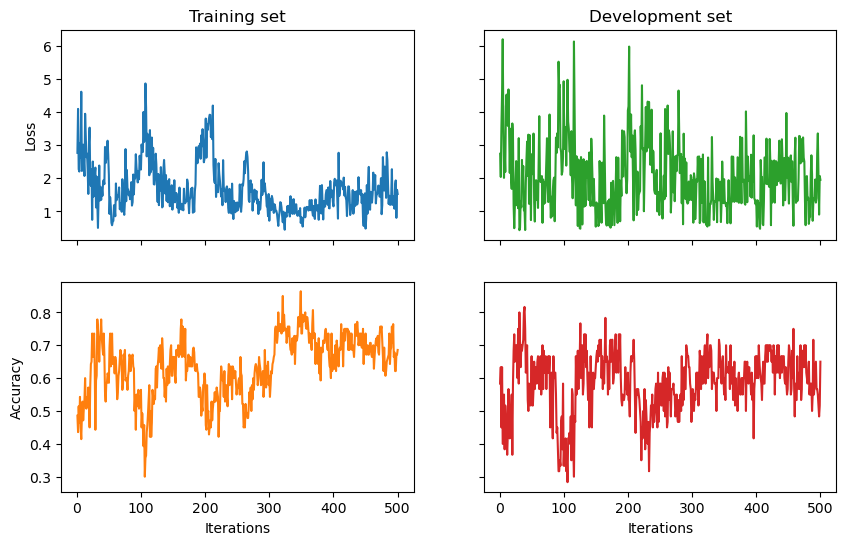

In [24]:
'''
Performance of the model!! 
'''


import matplotlib.pyplot as plt

trainer = trainerTK
model = modelTK
acc = accTK
fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2,
                                                     sharex=True,
                                                     sharey='row',
                                                     figsize=(10, 6))
ax_tl.set_title('Training set')
ax_tr.set_title('Development set')
ax_bl.set_xlabel('Iterations')
ax_br.set_xlabel('Iterations')
ax_bl.set_ylabel('Accuracy')
ax_tl.set_ylabel('Loss')

colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
range_ = np.arange(1, trainer.epochs+1)
ax_tl.plot(range_, trainer.train_epoch_costs, color=next(colours))
ax_bl.plot(range_, trainer.train_eval_results['acc'], color=next(colours))
ax_tr.plot(range_, trainer.val_costs, color=next(colours))
ax_br.plot(range_, trainer.val_eval_results['acc'], color=next(colours))

# print test accuracy
pred = model(test_circuits)
labels = torch.tensor(test_labels)

print('Final test accuracy: {}'.format(acc(pred, labels)))

# print test accuracy - tket
modelTK.load(trainerTK.log_dir + '/best_model.lt')
val_acc = accTK(modelTK(test_circuits), test_labels)
print('Validation accuracy:', val_acc.item())

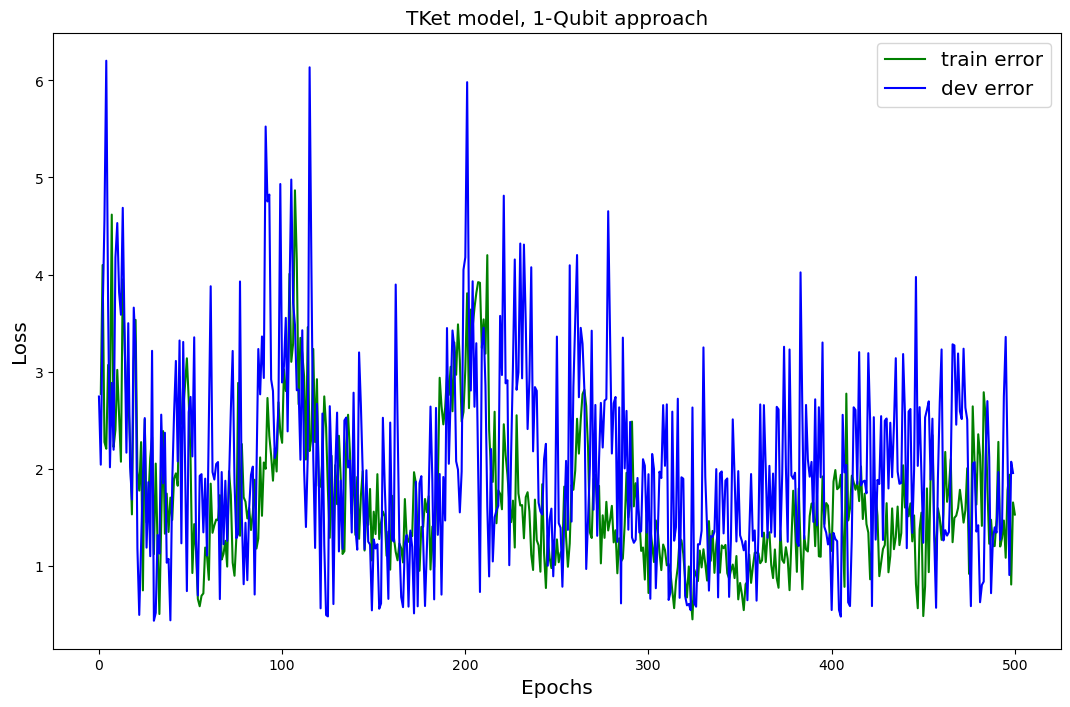

In [19]:
from matplotlib import pyplot as plt

fig, ax1 = plt.subplots(figsize=(13, 8))

# ax1.plot(range_, trainer.train_epoch_costs, '-k', markersize=4, label='cost')
ax1.plot(range_, trainer.train_epoch_costs, '-g', markersize=4, label='train error')
ax1.plot(range(len(trainer.val_costs)), trainer.val_costs, '-b', markersize=4, label='dev error')
ax1.set_ylabel(r"Loss", fontsize='x-large')
ax1.set_xlabel(r"Epochs", fontsize='x-large')
# ax1.legend(loc='upper center', fontsize='x-large')

# ax2 = ax1.twinx()
# ax2.set_ylabel(r"Error in \%", fontsize='x-large')
# ax2.plot(range_, trainer.train_epoch_costs, '-g', markersize=4, label='train error')
# ax2.plot(range(len(trainer.val_costs)), trainer.val_costs, '-b', markersize=4, label='dev error')
# ax2.plot(range(len(trainer.train_costs)), trainer.train_costs, '-r', markersize=4, label='test error')
ax1.legend(loc='upper right', fontsize='x-large')


plt.title('TKet model, 1-Qubit approach', fontsize='x-large')
plt.savefig('MC_task_ECS_Results.png', dpi=300, facecolor='white')  
plt.show()


In [20]:
# save the models parameters to pkl files 



# numpy 
model = modelNumpy
trainer = trainerNumpy
filename = '../modelParameters/NumpyModel_AEICA_2QB_500_gijs'
acc = accNP
model.load(trainer.log_dir + '/best_model.lt')
val_acc = acc(model(test_circuits), test_labels)

dump_data = {
    'train_epoch_cost': trainer.train_epoch_costs,
    'train_eval_results': trainer.train_eval_results['acc'],
    'val_costs': trainer.val_costs, 
    'val_eval_results': trainer.val_eval_results['acc'],
    'test_acc': val_acc.item()
}
with open(filename+'.pkl', 'wb') as file_handle:
    pickle.dump(dump_data, file_handle)




# tket
model = modelTK
trainer = trainerTK
filename = '../modelParameters/TKetModel_AEICA_2QB_500_gijs'
acc = accTK
model.load(trainer.log_dir + '/best_model.lt')
val_acc = acc(model(test_circuits), test_labels)

dump_data = {
    'train_epoch_cost': trainer.train_epoch_costs,
    'train_eval_results': trainer.train_eval_results['acc'],
    'val_costs': trainer.val_costs, 
    'val_eval_results': trainer.val_eval_results['acc'],
    'test_acc': val_acc.item()
}
with open(filename+'.pkl', 'wb') as file_handle:
    pickle.dump(dump_data, file_handle)







# pennylane 
model = modelPennylane
trainer = trainerPennylane
acc = accPL
filename = '../modelParameters/PennylaneModel_AEICA_2QB_500_gijs'
pred = model(test_circuits)
labels = torch.tensor(test_labels)

dump_data = {
    'train_epoch_cost': trainer.train_epoch_costs,
    'train_eval_results': trainer.train_eval_results['acc'],
    'val_costs': trainer.val_costs, 
    'val_eval_results': trainer.val_eval_results['acc'],
    'test_acc': acc(pred, labels)
}
with open(filename+'.pkl', 'wb') as file_handle:
    pickle.dump(dump_data, file_handle)